In [26]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pydot
import pandas as pd

In [27]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [28]:
x_train.shape,x_train.dtype #uint8 means pixel value ranges from 0 to 255

((60000, 28, 28), dtype('uint8'))

In [29]:
x_val,x_train = x_train[:5000]/255,x_train[5000:]/255
y_val,y_train = y_train[:5000],y_train[5000:]
x_test = x_test/255

In [30]:
len(x_val),len(x_train),len(y_val),len(y_train),len(x_test)

(5000, 55000, 5000, 55000, 10000)

In [31]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

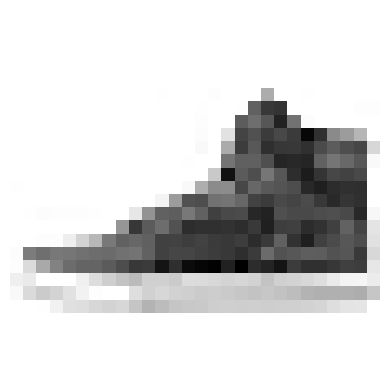

In [32]:
plt.imshow(x_train[20],cmap='binary')
plt.axis('off')
plt.show()

In [33]:
class_names =['Tshirt','Trouser','Pullover','Dress','Coat','Sandals','Shirt','Sneakers','Bag','AnkelBoot']

In [34]:
class_names[y_train[20]]

'Sneakers'

In [35]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

/home/thoth/Desktop/NN/nn_venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [37]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

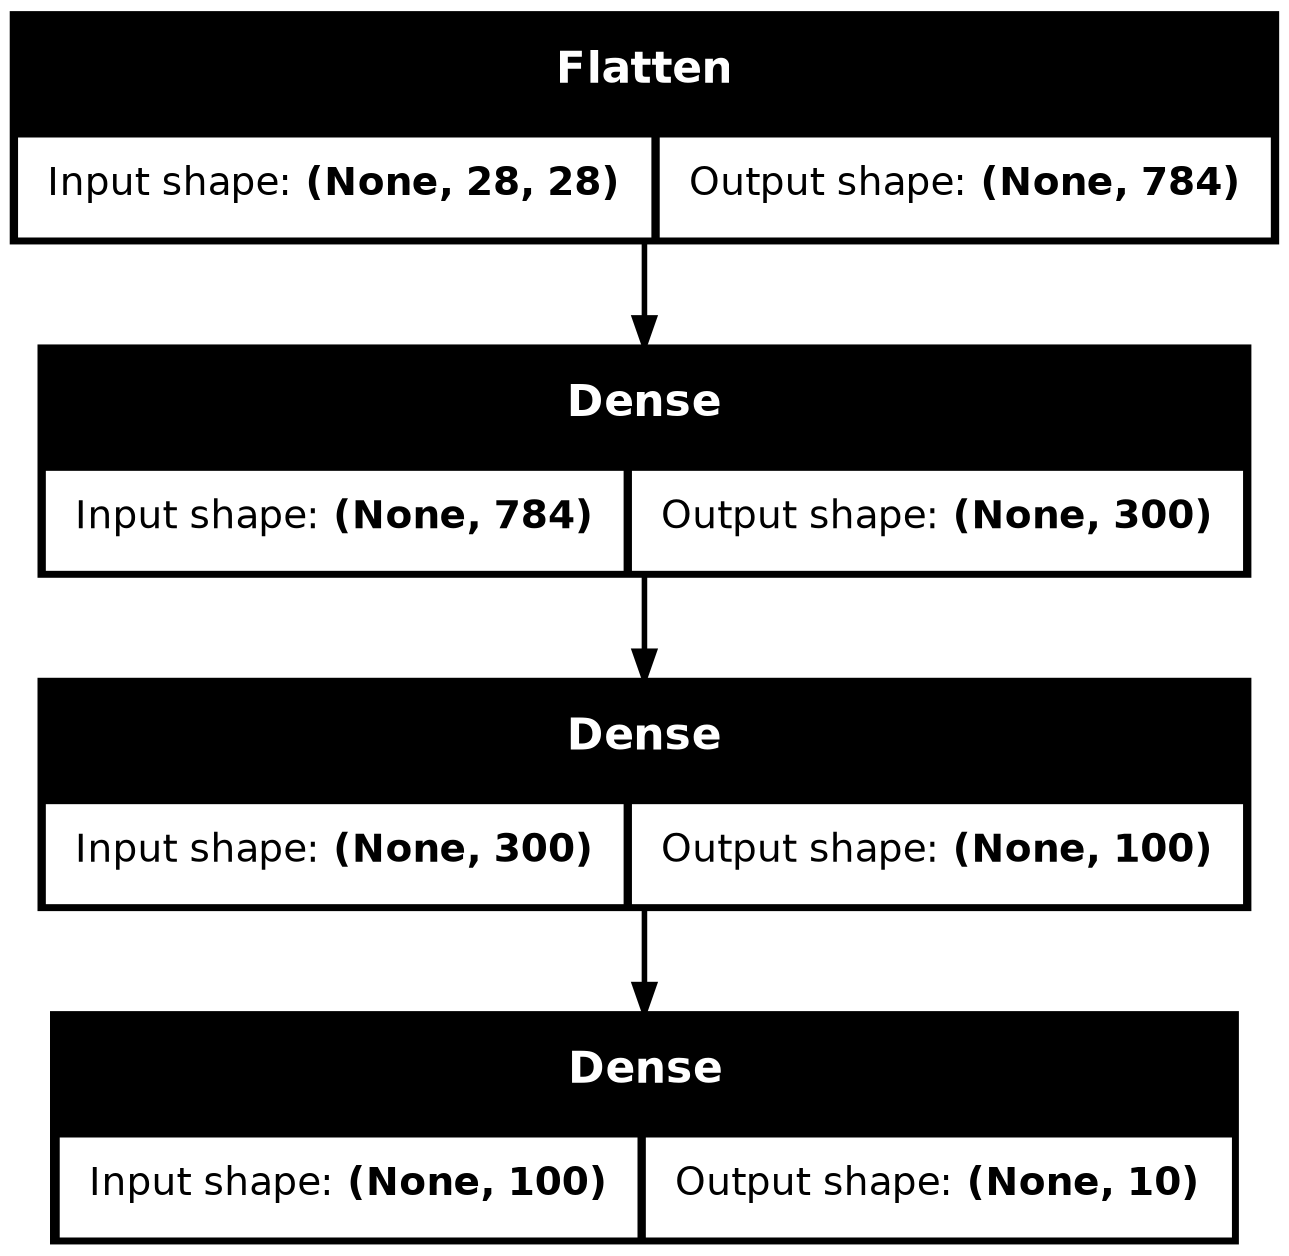

In [39]:
keras.utils.plot_model(model,"fashion_model.png",show_shapes=True)

In [40]:
hidden1=model.layers[1]
hidden1.name

'dense'

In [41]:
weights,biases = hidden1.get_weights()

In [42]:
weights

array([[-0.01679152,  0.07315643, -0.04327121, ...,  0.04490313,
         0.05219261,  0.02196872],
       [ 0.06507449, -0.00619878,  0.02811147, ..., -0.01955213,
        -0.05214851, -0.00367647],
       [ 0.00362194, -0.06904234, -0.0348954 , ..., -0.02471256,
         0.026921  ,  0.04943432],
       ...,
       [-0.0320733 , -0.05491535,  0.02278753, ...,  0.04290939,
        -0.06710317, -0.07067795],
       [ 0.05090566, -0.03057836, -0.04491305, ...,  0.00204179,
         0.00574568, -0.03564115],
       [ 0.0456473 , -0.04881741, -0.00095587, ...,  0.04679163,
        -0.0062248 , -0.02268688]], dtype=float32)

In [43]:
weights.shape

(784, 300)

In [44]:
model.compile(loss='sparse_categorical_crossentropy',optimizer="sgd",metrics=['accuracy'])

In [45]:
history = model.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val))

2024-11-02 17:30:16.763819: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.
2024-11-02 17:30:17.014213: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6924 - loss: 0.9810 - val_accuracy: 0.8208 - val_loss: 0.5285
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8235 - loss: 0.5044 - val_accuracy: 0.8426 - val_loss: 0.4603
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8414 - loss: 0.4487 - val_accuracy: 0.8524 - val_loss: 0.4261
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8516 - loss: 0.4178 - val_accuracy: 0.8598 - val_loss: 0.4024
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8586 - loss: 0.3960 - val_accuracy: 0.8654 - val_loss: 0.3870
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8662 - loss: 0.3792 - val_accuracy: 0.8694 - val_loss: 0.3755
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8701 - loss: 0.3655 - val_accuracy: 0.8718 - val_loss: 0.3652
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8736 - loss: 0.3533 - 

In [46]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [47]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

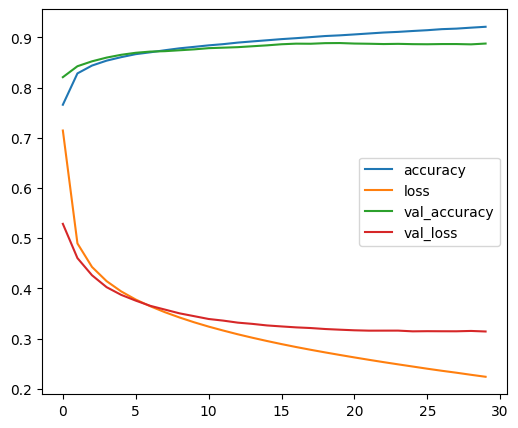

In [49]:
pd.DataFrame(history.history).plot(figsize=(6,5))
plt.show()

In [50]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8761 - loss: 0.3495


[0.3492022752761841, 0.8790000081062317]